### About the task

The goal of this task is to acquire skills in working with images, training and measuring the quality of convolutional neural network models using the *Keras* framework.

Task: Using neural networks, create models that predict which number is displayed in the image.

Data: MNIST

More about the data: [https://en.wikipedia.org/wiki/MNIST_database](https://en.wikipedia.org/wiki/MNIST_database)

**1.** Load data from the keras MNIST library using the `load_data` function.

Separate the data into training and validation sets. Calculate the number of instances for each class in the training and validation sets. Compute the proportion of data that the validation set represents.

Display one example from each class as an image with the corresponding label in the title.

`import matplotlib.pyplot as plt plt.title(label) plt.imshow(img)`

**Link:** [https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html](https://matplotlib.org/stable/gallery/axes_grid1/simple_axesgrid.html)

In [23]:
from keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense,Dropout,Conv2D,Flatten,MaxPooling2D, BatchNormalization
from tensorflow.keras.activations import softmax,tanh,relu,sigmoid
from tensorflow.keras.metrics import Accuracy,Precision,AUC,FalseNegatives,FalsePositives,TrueNegatives,TruePositives, Recall, Precision
from tensorflow.keras import regularizers
from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import SGD,Adam,Adamax
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.regularizers import L1,L2,L1L2
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, LearningRateScheduler, Callback
import tensorflow as tf
from livelossplot import PlotLossesKeras
from itertools import permutations,product
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from PIL import Image 

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
(x_traint, y_traint), (x_testt, y_testt) = (x_train, y_train), (x_test, y_test)

In [4]:
num_c = len(pd.DataFrame(y_train).groupby(y_train))

In [5]:
repres = [pd.DataFrame(y_train == i).idxmax()[0] for i in range(len(pd.DataFrame(y_train).groupby(y_train)))]

In [6]:
repres[0]

1

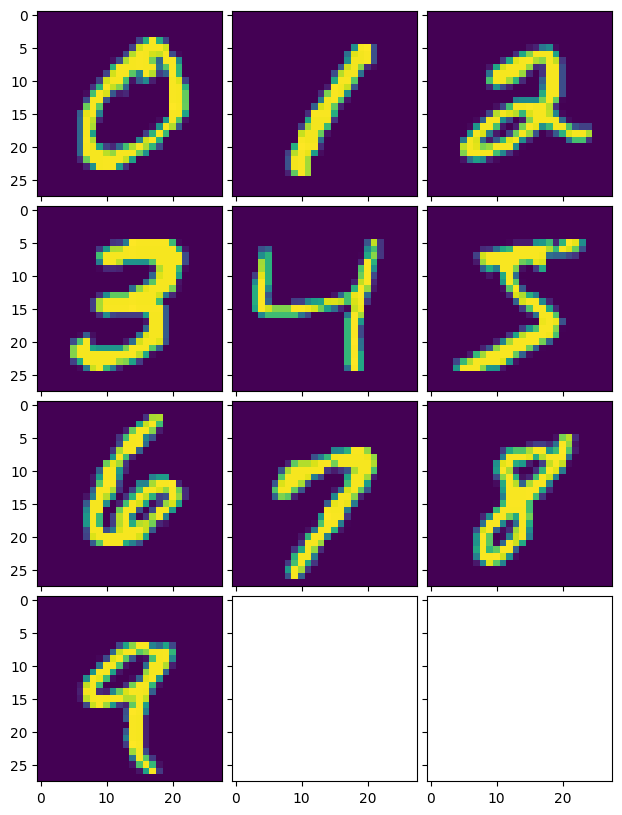

In [7]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(len(repres)//3+1, len(repres)//3),  # creates 2x2 grid of axes
                 axes_pad=0.1,  # pad between axes in inch.
                 )
cnt = 0
for ax, im in zip(grid, x_train[repres]):
    # Iterating over the grid returns the Axes.
    ax.imshow(im)
    ax.set_label(cnt)
    cnt += 1

plt.show()

**2.** The data needs to be preprocessed: data type is to be converted to float32, MinMax normalization of the data

In [8]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

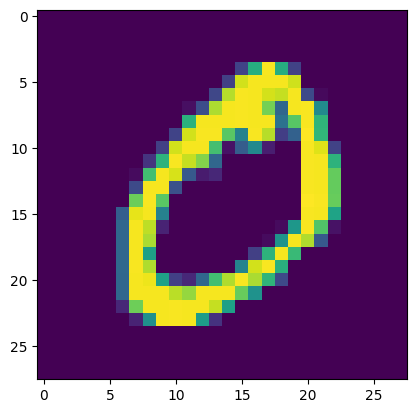

In [9]:
plt.imshow(x_train[1])

In [10]:
ind = 0
for img in x_train:
    scaler = MinMaxScaler()
    x_train[ind] = scaler.fit_transform(img)
    ind+=1

In [11]:
ind = 0
for img in x_test:
    scaler = MinMaxScaler()
    x_test[ind] = scaler.fit_transform(img)
    ind+=1

In [12]:
x_train[1].min(),x_train[1].max()

(0.0, 1.0)

In [13]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [14]:
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.array(y_train).reshape(-1,1))

In [15]:
enc = OneHotEncoder(sparse=False)
y_test = enc.fit_transform(np.array(y_test).reshape(-1,1))

### **3.** Let's build several neural network architectures

- Three fully connected layers
- One convolutional layer, one fully connected layer
- Two convolutional layers, one fully connected layer
- Three convolutional layers, one fully connected layer
- Two convolutional layers, two fully connected layers
- Add the following layers between the layers of the best architecture:
    - *MaxPooling*
    - *Dropout*
    - *BatchNormalization*
- Train the models and find the architecture with the best score on the validation set (`model.evaluate`)

`from keras.layers impot Dense, Conv2D, Flatten, BatchNormalization ...`

- Train convolutional layers with number of filters (16, 32, 64)
- Train convolutional layers with padding *same*
- Pooling window size 3x3
- Activation function in layers *ReLU*
- Train models with loss optimizer *SGD*
- Train models with learning rate drop (learning rate) in loss optimizers using step decay technique
- Train models with 10, 15 epochs

### One convolutional layer, one fully connected layer

In [16]:
model2 = Sequential(
    [
        Input(shape=(28,28,1)),
        Conv2D(64, kernel_size=(3, 3), activation="relu",input_shape=(28, 28, 1)),
        Flatten(),
        Dense(units = 10, activation="softmax"),
    ]
)
# print(model.output_shape)
batch_size = 128
epochs = 15

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = EarlyStopping(monitor='loss', patience=5)
model2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[callback])
# print(history)
score = model2.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
tmp2 = model2.predict(x_test).reshape(1,-1)[0]

Epoch 1/15
422/422 [==============================] - 40s 93ms/step - loss: 0.2332 - accuracy: 0.9342 - val_loss: 0.0849 - val_accuracy: 0.9770
Epoch 2/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0801 - accuracy: 0.9767 - val_loss: 0.0745 - val_accuracy: 0.9797
Epoch 3/15
422/422 [==============================] - 36s 85ms/step - loss: 0.0545 - accuracy: 0.9836 - val_loss: 0.0636 - val_accuracy: 0.9818
Epoch 4/15
422/422 [==============================] - 38s 90ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0728 - val_accuracy: 0.9803
Epoch 5/15
422/422 [==============================] - 35s 83ms/step - loss: 0.0324 - accuracy: 0.9903 - val_loss: 0.0660 - val_accuracy: 0.9837
Epoch 6/15
422/422 [==============================] - 34s 82ms/step - loss: 0.0253 - accuracy: 0.9925 - val_loss: 0.0793 - val_accuracy: 0.9798
Epoch 7/15
422/422 [==============================] - 40s 95ms/step - loss: 0.0203 - accuracy: 0.9941 - val_loss: 0.0745 - val_accuracy:

In [18]:
model2.save('model2.h5')

In [19]:
predict2 = tmp2.reshape(-1,10)

In [22]:
nums2 = [(pd.DataFrame(predict2[i]).idxmax())[0] for i in range(len(predict2))]

In [23]:
print(classification_report(nums2,y_testt.astype(np.int32)))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1001
           1       0.99      0.99      0.99      1130
           2       0.98      0.97      0.98      1043
           3       0.99      0.97      0.98      1025
           4       0.99      0.98      0.98       993
           5       0.98      0.97      0.98       900
           6       0.96      0.99      0.98       932
           7       0.97      0.98      0.98      1018
           8       0.97      0.97      0.97       981
           9       0.96      0.99      0.97       977

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [27]:
errs = []
for i in range(len(nums2)):
    if nums2[i] != y_testt[i]:
        errs.append([i,nums2[i],y_testt[i]])
#         print(nums[i])
    else:
        pass
print(len(errs))

211


### 3 Fully connected

In [40]:
model1 = Sequential([
    Dense(128,input_shape = (28,28,1), activation=relu),
    Dense(128, activation=relu),
    Flatten(),
    Dense(10,activation=softmax)
])

# print(model.output_shape)
batch_size = 128
epochs = 10

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = EarlyStopping(monitor='loss', patience=5)
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[callback])
# history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[PlotLossesKeras(),callback])
# print(history)
score = model1.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
tmp1 = model1.predict(x_test).reshape(1,-1)[0]
model1.save('model1.h5')

Epoch 1/10
422/422 [==============================] - 169s 398ms/step - loss: 0.3626 - accuracy: 0.8959 - val_loss: 0.2395 - val_accuracy: 0.9315
Epoch 2/10
422/422 [==============================] - 188s 445ms/step - loss: 0.2870 - accuracy: 0.9177 - val_loss: 0.2362 - val_accuracy: 0.9303
Epoch 3/10
422/422 [==============================] - 157s 371ms/step - loss: 0.2696 - accuracy: 0.9239 - val_loss: 0.2418 - val_accuracy: 0.9312
Epoch 4/10
422/422 [==============================] - 149s 353ms/step - loss: 0.2607 - accuracy: 0.9257 - val_loss: 0.2198 - val_accuracy: 0.9383
Epoch 5/10
422/422 [==============================] - 148s 352ms/step - loss: 0.2486 - accuracy: 0.9291 - val_loss: 0.2160 - val_accuracy: 0.9395
Epoch 6/10
422/422 [==============================] - 107s 253ms/step - loss: 0.2355 - accuracy: 0.9327 - val_loss: 0.2120 - val_accuracy: 0.9383
Epoch 7/10
422/422 [==============================] - 106s 251ms/step - loss: 0.2239 - accuracy: 0.9364 - val_loss: 0.2282 -

### 2 Convulutional 1 fully connected

In [41]:
model3 = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(10,activation=softmax)
])

# print(model.output_shape)
batch_size = 128
epochs = 10

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = EarlyStopping(monitor='loss', patience=5)
model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[callback])
# history = model3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  =0.1,callbacks=[PlotLossesKeras(),callback])
score = model3.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
tmp3 = model3.predict(x_test).reshape(1,-1)[0]
model3.save('model3.h5')

Epoch 1/10
422/422 [==============================] - 52s 121ms/step - loss: 0.2197 - accuracy: 0.9388 - val_loss: 0.0738 - val_accuracy: 0.9813
Epoch 2/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0701 - accuracy: 0.9802 - val_loss: 0.0588 - val_accuracy: 0.9855
Epoch 3/10
422/422 [==============================] - 50s 120ms/step - loss: 0.0513 - accuracy: 0.9859 - val_loss: 0.0599 - val_accuracy: 0.9848
Epoch 4/10
422/422 [==============================] - 50s 119ms/step - loss: 0.0386 - accuracy: 0.9899 - val_loss: 0.0562 - val_accuracy: 0.9863
Epoch 5/10
422/422 [==============================] - 51s 120ms/step - loss: 0.0309 - accuracy: 0.9923 - val_loss: 0.0616 - val_accuracy: 0.9860
Epoch 6/10
422/422 [==============================] - 51s 120ms/step - loss: 0.0256 - accuracy: 0.9936 - val_loss: 0.0637 - val_accuracy: 0.9865
Epoch 7/10
422/422 [==============================] - 46s 109ms/step - loss: 0.0226 - accuracy: 0.9948 - val_loss: 0.0610 - val_ac

### 3 Convolutional 1 fully connected

In [42]:
model4 = Sequential(
    [
        Input(shape=(28,28,1)),
        Conv2D(64, kernel_size=(3, 3), activation="relu",input_shape=(28, 28, 1)),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        Flatten(),
        Dense(units = 10, activation="softmax"),
    ]
)
# print(model.output_shape)
batch_size = 128
epochs = 10

model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[callback])
callback = EarlyStopping(monitor='loss', patience=5)
# history = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_split=0.1,callbacks=[PlotLossesKeras(),callback])
score = model4.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
tmp4 = model4.predict(x_test).reshape(1,-1)[0]
model4.save('model4.h5')

Epoch 1/10
422/422 [==============================] - 111s 257ms/step - loss: 0.1749 - accuracy: 0.9491 - val_loss: 0.0639 - val_accuracy: 0.9832
Epoch 2/10
422/422 [==============================] - 108s 257ms/step - loss: 0.0519 - accuracy: 0.9842 - val_loss: 0.0422 - val_accuracy: 0.9875
Epoch 3/10
422/422 [==============================] - 108s 256ms/step - loss: 0.0348 - accuracy: 0.9887 - val_loss: 0.0506 - val_accuracy: 0.9857
Epoch 4/10
422/422 [==============================] - 108s 255ms/step - loss: 0.0230 - accuracy: 0.9931 - val_loss: 0.0431 - val_accuracy: 0.9888
Epoch 5/10
422/422 [==============================] - 107s 254ms/step - loss: 0.0172 - accuracy: 0.9944 - val_loss: 0.0520 - val_accuracy: 0.9858
Epoch 6/10
422/422 [==============================] - 108s 256ms/step - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0496 - val_accuracy: 0.9878
Epoch 7/10
422/422 [==============================] - 108s 257ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.0497 -

### 2 Convolutional, 2 fully connected

In [16]:
model5 = Sequential([
    Input(shape=(28,28,1)),
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation=relu,kernel_regularizer=L2(1e-4)),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    Flatten(),
    Dense(50, activation=relu, kernel_regularizer=L2(1e-4)),
    Dense(50, activation=relu, kernel_regularizer=L2(1e-4)),
    Dense(10, activation=softmax)
])
# print(model.output_shape)
batch_size = 128
epochs = 10

model5.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
callback = EarlyStopping(monitor='loss', patience=5)
model5.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1,callbacks=[callback])
# history = model4.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,  validation_split=0.1,callbacks=[PlotLossesKeras(),callback])
score = model5.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])
tmp5 = model5.predict(x_test).reshape(1,-1)[0]
model5.save('model5.h5')

Epoch 1/10
422/422 [==============================] - 84s 197ms/step - loss: 0.2533 - accuracy: 0.9286 - val_loss: 0.1057 - val_accuracy: 0.9768
Epoch 2/10
422/422 [==============================] - 77s 182ms/step - loss: 0.0961 - accuracy: 0.9804 - val_loss: 0.0968 - val_accuracy: 0.9815
Epoch 3/10
422/422 [==============================] - 81s 193ms/step - loss: 0.0783 - accuracy: 0.9856 - val_loss: 0.0914 - val_accuracy: 0.9828
Epoch 4/10
422/422 [==============================] - 75s 179ms/step - loss: 0.0689 - accuracy: 0.9890 - val_loss: 0.0912 - val_accuracy: 0.9830
Epoch 5/10
422/422 [==============================] - 73s 174ms/step - loss: 0.0628 - accuracy: 0.9906 - val_loss: 0.0880 - val_accuracy: 0.9858
Epoch 6/10
422/422 [==============================] - 75s 177ms/step - loss: 0.0614 - accuracy: 0.9917 - val_loss: 0.0901 - val_accuracy: 0.9853
Epoch 7/10
422/422 [==============================] - 75s 179ms/step - loss: 0.0597 - accuracy: 0.9921 - val_loss: 0.0915 - val_ac

#### As the best architecture, I will use 2 convolutions and 1 fully connected layers and 3 convulutiond and 1 fully connected then I will add MaxPooling and BatchNormalisation

In [29]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation=relu,kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(10,activation=softmax),
    Dropout(0.2)
])
model.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model.fit(x_train, y_train, epochs=20, batch_size=30,verbose=1, validation_split=0.1)
res = model.evaluate(x_test,y_test)
print('accuracy = ', res[1])

Epoch 1/20
1800/1800 [==============================] - 37s 20ms/step - loss: 3.3565 - accuracy: 0.7600 - val_loss: 0.0616 - val_accuracy: 0.9832
Epoch 2/20
1800/1800 [==============================] - 38s 21ms/step - loss: 3.2684 - accuracy: 0.7838 - val_loss: 0.0696 - val_accuracy: 0.9817
Epoch 3/20
1800/1800 [==============================] - 39s 22ms/step - loss: 3.2734 - accuracy: 0.7856 - val_loss: 0.0534 - val_accuracy: 0.9860
Epoch 4/20
1800/1800 [==============================] - 39s 21ms/step - loss: 3.2504 - accuracy: 0.7886 - val_loss: 0.0554 - val_accuracy: 0.9842
Epoch 5/20
1800/1800 [==============================] - 39s 22ms/step - loss: 3.2617 - accuracy: 0.7886 - val_loss: 0.0467 - val_accuracy: 0.9877
Epoch 6/20
1800/1800 [==============================] - 38s 21ms/step - loss: 3.2240 - accuracy: 0.7925 - val_loss: 0.0516 - val_accuracy: 0.9872
Epoch 7/20
1800/1800 [==============================] - 38s 21ms/step - loss: 3.2639 - accuracy: 0.7896 - val_loss: 0.0447 -

In [30]:
model.save("bestmodel.h5")

In [31]:
model2 = Sequential([
    Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation=relu,kernel_regularizer=L2(1e-5)),
    Dropout(0.1),
    MaxPooling2D(),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-5)),
    Dropout(0.1),
    MaxPooling2D(),
    BatchNormalization(),
    Flatten(),
    Dense(10, activation=softmax)
])
model2.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model2.fit(x_train, y_train, epochs=20, batch_size=30,verbose=1, validation_split=0.1)
res = model2.evaluate(x_test,y_test)
print('accuracy = ', res[1])

Epoch 1/20
1800/1800 [==============================] - 167s 93ms/step - loss: 0.1081 - accuracy: 0.9661 - val_loss: 0.0833 - val_accuracy: 0.9768
Epoch 2/20
1800/1800 [==============================] - 128s 71ms/step - loss: 0.0516 - accuracy: 0.9845 - val_loss: 0.0457 - val_accuracy: 0.9877
Epoch 3/20
1800/1800 [==============================] - 175s 97ms/step - loss: 0.0396 - accuracy: 0.9880 - val_loss: 0.0410 - val_accuracy: 0.9893
Epoch 4/20
1800/1800 [==============================] - 106s 59ms/step - loss: 0.0314 - accuracy: 0.9908 - val_loss: 0.0525 - val_accuracy: 0.9863
Epoch 5/20
1800/1800 [==============================] - 110s 61ms/step - loss: 0.0250 - accuracy: 0.9925 - val_loss: 0.0470 - val_accuracy: 0.9882
Epoch 6/20
1800/1800 [==============================] - 111s 62ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0440 - val_accuracy: 0.9902
Epoch 7/20
1800/1800 [==============================] - 116s 65ms/step - loss: 0.0190 - accuracy: 0.9944 - val_loss: 0

In [32]:
model2.save("bestmodel2.h5")

In [33]:
model3 = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation=relu,kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, kernel_size=(3,3), activation=relu, kernel_regularizer=L2(1e-4)),
    MaxPooling2D(),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(10,activation=softmax),
    Dropout(0.2)
])
model3.compile(loss=CategoricalCrossentropy(), optimizer=Adam(), metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20, batch_size=30,verbose=1, validation_split=0.1)
res = model3.evaluate(x_test,y_test)
print('accuracy = ', res[1])

Epoch 1/20
1800/1800 [==============================] - 53s 29ms/step - loss: 3.5429 - accuracy: 0.7163 - val_loss: 0.0938 - val_accuracy: 0.9745
Epoch 2/20
1800/1800 [==============================] - 53s 29ms/step - loss: 3.3092 - accuracy: 0.7691 - val_loss: 0.0743 - val_accuracy: 0.9800
Epoch 3/20
1800/1800 [==============================] - 46s 26ms/step - loss: 3.3472 - accuracy: 0.7704 - val_loss: 0.0667 - val_accuracy: 0.9835
Epoch 4/20
1800/1800 [==============================] - 45s 25ms/step - loss: 3.3048 - accuracy: 0.7764 - val_loss: 0.0639 - val_accuracy: 0.9838
Epoch 5/20
1800/1800 [==============================] - 45s 25ms/step - loss: 3.3432 - accuracy: 0.7758 - val_loss: 0.0742 - val_accuracy: 0.9815
Epoch 6/20
1800/1800 [==============================] - 45s 25ms/step - loss: 3.3329 - accuracy: 0.7762 - val_loss: 0.0636 - val_accuracy: 0.9865
Epoch 7/20
1800/1800 [==============================] - 47s 26ms/step - loss: 3.3375 - accuracy: 0.7781 - val_loss: 0.0650 -

## Best model is 2 convolutions and 1 fully connected. I will use it later in my GUI to recognise digits in real time action

### Help links:

- https://keras.io/about/
- https://keras.io/guides/sequential_model/
- https://keras.io/api/layers/
- https://keras.io/api/callbacks/
- https://keras.io/api/optimizers/
- https://keras.io/api/losses/
- https://towardsdatascience.com/building-a-convolutional-neural-network-cnn-in-keras-329fbbadc5f5